In [18]:
import praw
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Configuração da API do Reddit

reddit = praw.Reddit(
    client_id="lK3O2iN0BKwey2ksicdurw",
    client_secret="Geqdg3qH-M4ZdbKu_J9U8Z1XOB3-5g",
    user_agent="Projeto de Sentimentos",
)

# Escolhendo o subreddit

subreddit = reddit.subreddit(
    "technology"  # Categoria de coleta utilizada podendo ser especificada outras para outros tipos de coletas
)

# Coletando as postagens mais populares
posts = []
for post in subreddit.hot(limit=100):  # Limite de 100 postagem

    posts.append(post.title)  # Armazenando  os titulos em lista

# Treinamento do DataSete para categorizar os titulos

dados = {
    "Título": [
        "Novo modelo de IA revolucionário",
        "Python é a melhor linguagem de programação",
        "Avanços na computação quântica",
        "Guia para iniciantes em aprendizado de máquina",
        "Tecnologia 5G está mudando o mundo",
        "Como aprender JavaScript do zero",
        "Robôs estão substituindo empregos humanos",
    ],
    "Categoria": [
        "inteligência artificial",
        "programação",
        "tecnologia",
        "inteligência artificial",
        "tecnologia",
        "programação",
        "tecnologia",
    ],
}

# Cria o DataSete para utilização

import pandas as pd

df = pd.DataFrame(dados)

# Treinamento do modelo

vetorizador = TfidfVectorizer()
X = vetorizador.fit_transform(df["Título"])  # Vetorização do texto
y = df["Categoria"]
modelo = MultinomialNB()
modelo.fit(X, y)

# Classificação dos títulos coletados do Reddit

X_novos = vetorizador.transform(posts)  # Vetorizando os novos títulos
categorias_preditas = modelo.predict(X_novos)

# Exibindo os resultados

print("Classificação dos Títulos Coletados do Reddit:")
for titulo, categoria in zip(posts, categorias_preditas):
    print(f"Título: {titulo}")
    print(f"Categoria: {categoria}")
    print()

Classificação dos Títulos Coletados do Reddit:
Título: Perplexity CEO says its browser will track everything users do online to sell 'hyper personalized' ads | TechCrunch
Categoria: programação

Título: "You wouldn't steal a car" anti-piracy ads may have used a stolen font | The anti-piracy campaign that failed its own background check
Categoria: tecnologia

Título: Tesla’s Remarkably Bad Quarter Is Even Worse Than It Looks
Categoria: tecnologia

Título: Hegseth had unsecured internet line in Pentagon for Signal, sources say
Categoria: tecnologia

Título: Discord confirms it's moving toward 'becoming a public company' as it hires a former Activision executive as its new CEO
Categoria: tecnologia

Título: A Sydney radio station has been using an AI-generated host for about six months without disclosing it
Categoria: tecnologia

Título: By 2027, Apple to import all iPhones sold in the US from India, rather than China
Categoria: tecnologia

Título: A $20,000 electric truck with manual win

In [19]:
from textblob import TextBlob

# Função para análise de sentimento


def analisar_sentimento(texto):
    analise = TextBlob(texto)
    if analise.sentiment.polarity > 0:
        return "Positivo"
    elif analise.sentiment.polarity == 0:
        return "Neutro"
    else:
        return "Negativo"


resultados = [analisar_sentimento(post) for post in posts]

print("Análise de Sentimentos das Postagens:")
for i, (post, sentimento) in enumerate(zip(posts, resultados), start=1):
    print(f"{i}. Título: {post}")
    print(f"   Sentimento: {sentimento}")

Análise de Sentimentos das Postagens:
1. Título: Perplexity CEO says its browser will track everything users do online to sell 'hyper personalized' ads | TechCrunch
   Sentimento: Neutro
2. Título: "You wouldn't steal a car" anti-piracy ads may have used a stolen font | The anti-piracy campaign that failed its own background check
   Sentimento: Positivo
3. Título: Tesla’s Remarkably Bad Quarter Is Even Worse Than It Looks
   Sentimento: Negativo
4. Título: Hegseth had unsecured internet line in Pentagon for Signal, sources say
   Sentimento: Neutro
5. Título: Discord confirms it's moving toward 'becoming a public company' as it hires a former Activision executive as its new CEO
   Sentimento: Positivo
6. Título: A Sydney radio station has been using an AI-generated host for about six months without disclosing it
   Sentimento: Neutro
7. Título: By 2027, Apple to import all iPhones sold in the US from India, rather than China
   Sentimento: Neutro
8. Título: A $20,000 electric truck wi

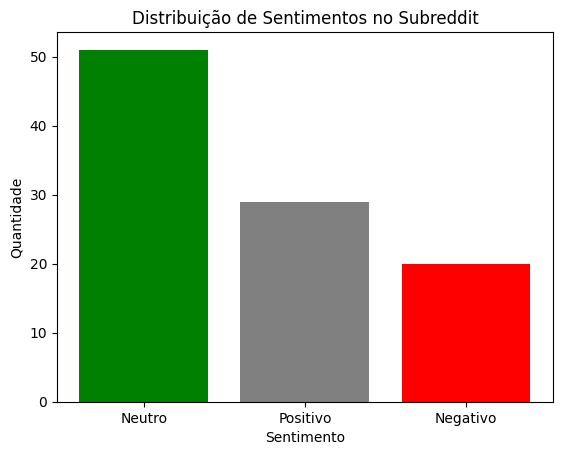

In [ ]:
import matplotlib.pyplot as plt

# Contando sentimentos

from collections import Counter
contagem = Counter(resultados)

# Gerando gráfico

plt.bar(contagem.keys(), contagem.values(), color=['green', 'grey', 'red'])
plt.title('Distribuição de Sentimentos no Subreddit')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
from collections import Counter
import re

# Processamento dos títulos para encontrar padrões

palavras = []
for title in posts:
    palavras.extend(re.findall(r"\w+", title.lower()))  # Quebra os títulos em palavras e converte para minúsculas

contagem = Counter(palavras)
print("Palavras mais frequentes nos títulos:")
for palavra, freq in contagem.most_common(10):  # Mostra as 10 palavras mais frequentes
    print(f"{palavra}: {freq}")

Palavras mais frequentes nos títulos:
to: 51
the: 37
a: 30
in: 25
and: 24
s: 21
of: 20
for: 16
ai: 15
as: 14


In [ ]:
from textblob import TextBlob

# Análise de sentimento para cada título

sentimentos = {"Positivo": 0, "Neutro": 0, "Negativo": 0}

for title in posts:
    analise = TextBlob(title)
    if analise.sentiment.polarity > 0:
        sentimentos["Positivo"] += 1
    elif analise.sentiment.polarity == 0:
        sentimentos["Neutro"] += 1
    else:
        sentimentos["Negativo"] += 1

print("Distribuição dos Sentimentos nos Títulos:")
for sentimento, quantidade in sentimentos.items():
    print(f"{sentimento}: {quantidade}")

Distribuição dos Sentimentos nos Títulos:
Positivo: 29
Neutro: 51
Negativo: 20


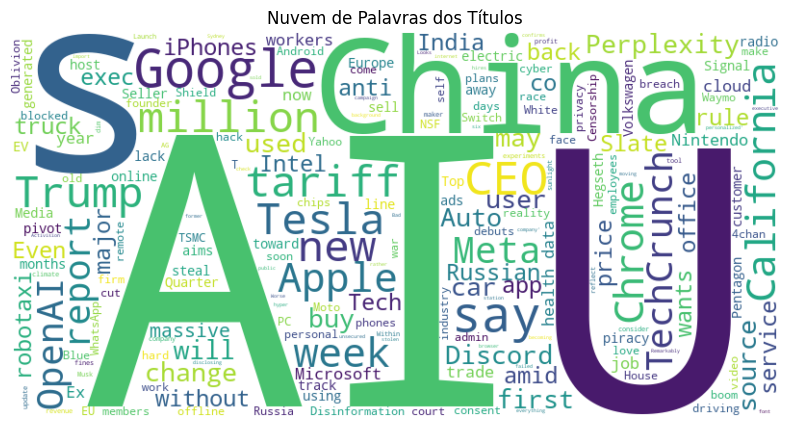

In [ ]:
from wordcloud import WordCloud

# Gerando a nuvem de palavras

texto = " ".join(posts) 
nuvem_palavras = WordCloud(width=800, height=400, background_color="white").generate(texto)

# Exibindo a nuvem de palavras

plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras dos Títulos")
plt.show()

In [ ]:
from datetime import datetime

# Coletando os timestamps das postagens

timestamps = []
for post in subreddit.hot(limit=100):
    timestamps.append(datetime.fromtimestamp(post.created_utc))


print("Horários das postagens:")
for timestamp in timestamps[:10]:  # Mostra os 10 primeiros
    print(timestamp)

Horários das postagens:
2025-04-25 02:36:05
2025-04-25 09:49:15
2025-04-25 00:00:45
2025-04-24 18:13:40
2025-04-24 20:10:31
2025-04-24 23:04:44
2025-04-25 07:40:54
2025-04-25 07:46:12
2025-04-25 11:29:10
2025-04-24 15:17:42


In [ ]:
# Filtrando postagens que contenham a palavra "AI"

palavra_chave = "AI"
postagens_filtradas = [post for post in posts if palavra_chave.lower() in post.lower()]

print(f"Postagens com a palavra '{palavra_chave}':")
for i, title in enumerate(postagens_filtradas, start=1):
    print(f"{i}. {title}")

Postagens com a palavra 'AI':
1. A Sydney radio station has been using an AI-generated host for about six months without disclosing it
2. Teachers Are Using AI to Grade Papers—While Banning Students From It
3. Waymo reports 250,000 paid robotaxi rides per week in U.S.
4. 4chan has been offline for over a week, and it's probably not coming back | Source code, admin email addresses, and subscriber info were all exposed in massive hack
5. Blue Shield of California shared private health data of 4.7 million members with Google without consent | A lot of personal details were used for targeted advertising
6. China isn’t trying to win the AI race | Beijing may have quietly concluded that being a close second to the US serves its interests better
7. Anger as Meta AI chatbot added to WhatsApp, raising privacy fears
8. AI supercomputers could need as much power as a major city center by 2030, study says
9. AI secretly helped write California bar exam, sparking uproar | A contractor used AI to cr

In [ ]:
# Coletando informações adicionais

postagens_detalhadas = []
for post in subreddit.hot(limit=100):
    postagens_detalhadas.append({
        "Título": post.title,
        "Autor": post.author.name if post.author else "Desconhecido",
        "Comentários": post.num_comments,
        "Pontuação": post.score
    })

for postagem in postagens_detalhadas[:5]:  # Mostra os 5 primeiros resultados
    print(postagem)

{'Título': "Perplexity CEO says its browser will track everything users do online to sell 'hyper personalized' ads | TechCrunch", 'Autor': 'ravik_reddit_007', 'Comentários': 1455, 'Pontuação': 7050}
{'Título': '"You wouldn\'t steal a car" anti-piracy ads may have used a stolen font | The anti-piracy campaign that failed its own background check', 'Autor': 'chrisdh79', 'Comentários': 28, 'Pontuação': 998}
{'Título': 'Tesla’s Remarkably Bad Quarter Is Even Worse Than It Looks', 'Autor': 'Majano57', 'Comentários': 359, 'Pontuação': 5789}
{'Título': 'Hegseth had unsecured internet line in Pentagon for Signal, sources say', 'Autor': 'Strict-Ebb-8959', 'Comentários': 824, 'Pontuação': 30526}
{'Título': "Discord confirms it's moving toward 'becoming a public company' as it hires a former Activision executive as its new CEO", 'Autor': 'FervidBug42', 'Comentários': 735, 'Pontuação': 6067}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorização dos textos

vetorizador = TfidfVectorizer()
X = vetorizador.fit_transform(df["Título"])  
y = df["Categoria"] 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Treinamento do modelo

modelo = MultinomialNB()
modelo.fit(X, y)

MultinomialNB()

In [15]:
import joblib

# Salvando o modelo e o vetorizador
joblib.dump(modelo, "modelo_classificacao.joblib")
joblib.dump(vetorizador, "vetorizador.joblib")

# Para carregar novamente:
# modelo = joblib.load("modelo_classificacao.joblib")
# vetorizador = joblib.load("vetorizador.joblib")

['vetorizador.joblib']

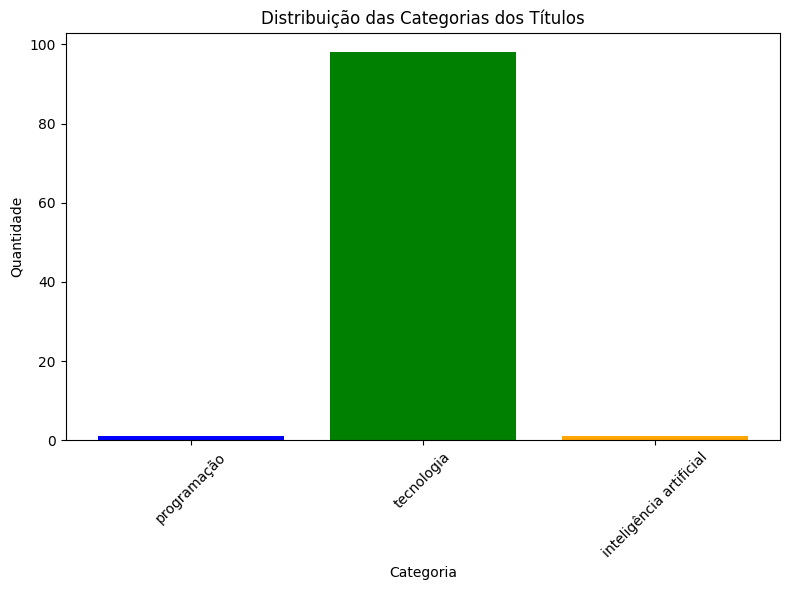

In [22]:
import matplotlib.pyplot as plt

# Contando as postagens por categoria

from collections import Counter

contagem_categorias = Counter(categorias_preditas)


labels = list(contagem_categorias.keys())
quantidades = list(contagem_categorias.values())

plt.figure(figsize=(8, 6))
plt.bar(labels, quantidades, color=["blue", "green", "orange"])
plt.title("Distribuição das Categorias dos Títulos")
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

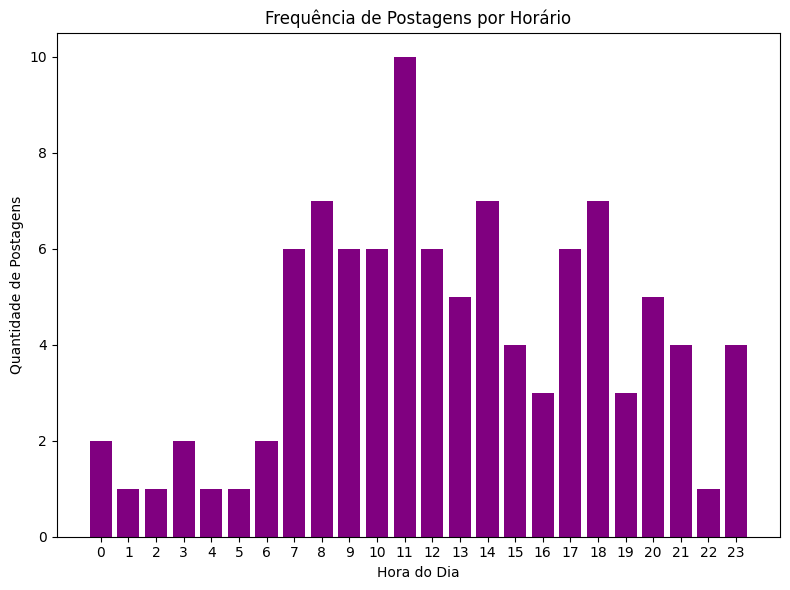

In [ ]:
from datetime import datetime

# Coletando timestamps das postagens

horarios = [datetime.fromtimestamp(post.created_utc) for post in subreddit.hot(limit=100)]

# Contando postagens por horário

horas = [horario.hour for horario in horarios]
contagem_horas = Counter(horas)

# Criando o gráfico de frequência por horário

plt.figure(figsize=(8, 6))
plt.bar(contagem_horas.keys(), contagem_horas.values(), color="purple")
plt.title("Frequência de Postagens por Horário")
plt.xlabel("Hora do Dia")
plt.ylabel("Quantidade de Postagens")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()